In [1]:
import pandas as pd
import os

In [2]:
my_databse = r'D:\science things\Izhora_Plateu\Data\Meteo\1798230.csv'
BIG_METEO = pd.read_csv(my_databse)

In [3]:
Lat_Lon = BIG_METEO[['LATITUDE', 'LONGITUDE','NAME']]

In [4]:
BIG_METEO = BIG_METEO[['NAME', 'DATE', 'PRCP', 'TAVG']]

In [5]:
List_Of_Stations = [[] for _ in range(len(BIG_METEO.NAME.unique()))]
for i, station in enumerate(BIG_METEO.NAME.unique()):
    for row in range(len(BIG_METEO)):
        fnd = True
        while fnd:
            fnd = False
            if station == BIG_METEO.iloc[row].NAME:
                List_Of_Stations[i].append(BIG_METEO.iloc[row])
                fnd = True
                break


List_Of_Stations = [pd.DataFrame(i) for i in List_Of_Stations]
for station in List_Of_Stations:
    station.DATE = pd.to_datetime(station.DATE)

VYBORG, RS 128 16781
GOGLAND, RS 7 9040
BELOGORKA, RS 16 16508
KINGISEPP, RS 508 16727
NARVA, EN 16801 16801
LJUBAN, RS 579 10339
PETROKREPOST, RS 9482 10853
ST. PETERSBURG, RS 0 16781


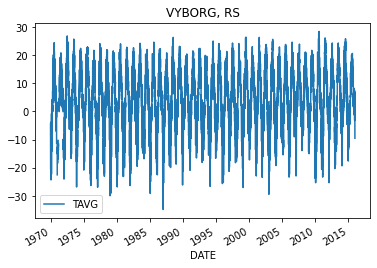

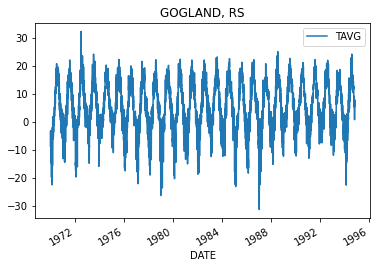

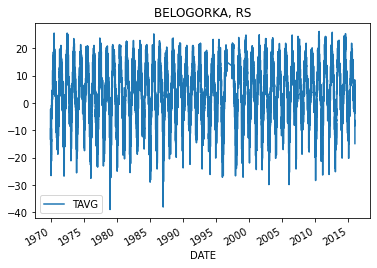

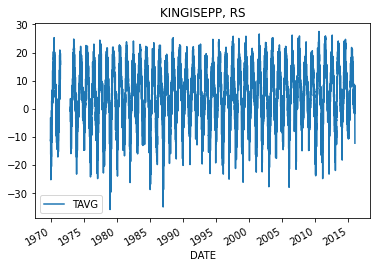

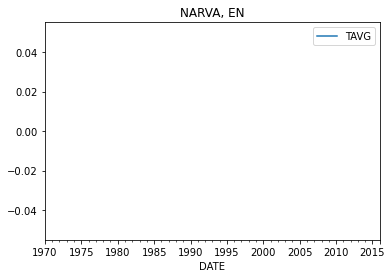

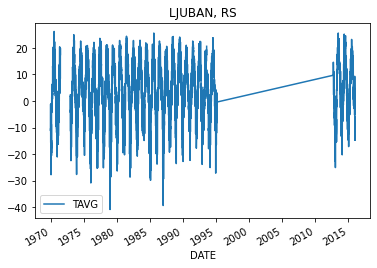

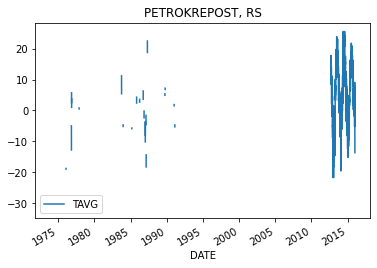

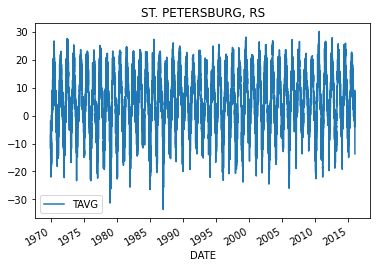

In [6]:
for i in range(len(List_Of_Stations)):
    f = 'TAVG'
    print(BIG_METEO.NAME.unique()[i], sum(List_Of_Stations[i][f].isna()), len(List_Of_Stations[i][f]))
    List_Of_Stations[i].plot(y = f, x = 'DATE', title = BIG_METEO.NAME.unique()[i])

In [6]:
List_Of_Stations_TAVG = [List_Of_Stations[i].drop(['PRCP'], axis = 1) for i in range(len(List_Of_Stations))]
List_Of_Stations_TAVG_monthly = list()

for i, station in enumerate(List_Of_Stations_TAVG):
    List_Of_Stations_TAVG[i].index = List_Of_Stations_TAVG[i].DATE
    List_Of_Stations_TAVG_monthly.append(List_Of_Stations_TAVG[i].resample('M').mean())

ttt = [[[] for _ in range(12)] for _ in range(len(List_Of_Stations_TAVG_monthly))]
small_list = list()
for i, station in enumerate(List_Of_Stations_TAVG_monthly):
    for mon in range(12):
        tt = [[j == k+1 for j in [station.index[i].month for i in range(len(station))]] for k in range(12)]
        for mask in tt:
            ttt[i][mon].append([item for sublist in station[mask].values for item in sublist])
            
monthly_TAVG = [pd.DataFrame([ttt[j][0][i] for i in range(12)]).T for j in range(len(List_Of_Stations_TAVG_monthly))]

monthes = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь', 'Декабрь']

for i in monthly_TAVG:
    i.columns = monthes

list_of_years = [pd.date_range(start = str(List_Of_Stations_TAVG[t].index.year.min()), end = str(List_Of_Stations_TAVG[t].index.year.max()+1), freq = 'Y') for t in range(len(List_Of_Stations_TAVG))]

for i in range(len(monthly_TAVG)):
    monthly_TAVG[i]['Среднегодовое'] = monthly_TAVG[i][monthes].mean(axis = 1, skipna = False)

for station in monthly_TAVG:
    for columns in station.columns:
        station[columns] = station[columns].astype('float64').apply('{:.2f}'.format)
        station[columns] = station[columns].astype('float64')

for i in range(len(monthly_TAVG)):
    monthly_TAVG[i].insert(loc = 0, column = 'date', value = list_of_years[i])
    monthly_TAVG[i] = monthly_TAVG[i].dropna()
    monthly_TAVG[i] = monthly_TAVG[i].reset_index(drop = True)

In [7]:
List_Of_Stations_PRCP = [List_Of_Stations[i].drop(['TAVG'], axis = 1) for i in range(len(List_Of_Stations))]
List_Of_Stations_PRCP_monthly = list()

for i, station in enumerate(List_Of_Stations_PRCP):
    List_Of_Stations_PRCP[i].index = List_Of_Stations_PRCP[i].DATE
    List_Of_Stations_PRCP_monthly.append(List_Of_Stations_PRCP[i].resample('M').sum())

ttt = [[[] for _ in range(12)] for _ in range(len(List_Of_Stations_PRCP_monthly))]
small_list = list()
for i, station in enumerate(List_Of_Stations_PRCP_monthly):
    for mon in range(12):
        tt = [[j == k+1 for j in [station.index[i].month for i in range(len(station))]] for k in range(12)]
        for mask in tt:
            ttt[i][mon].append([item for sublist in station[mask].values for item in sublist])
            
monthly_PRCP = [pd.DataFrame([ttt[j][0][i] for i in range(12)]).T for j in range(len(List_Of_Stations_PRCP_monthly))]

monthes = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь', 'Декабрь']

for i in monthly_PRCP:
    i.columns = monthes

list_of_years = [pd.date_range(start = str(List_Of_Stations_PRCP[t].index.year.min()), end = str(List_Of_Stations_PRCP[t].index.year.max()+1), freq = 'Y') for t in range(len(List_Of_Stations_PRCP))]

for i in range(len(monthly_PRCP)):
    monthly_PRCP[i]['Среднегодовое'] = monthly_PRCP[i][monthes].sum(axis = 1, skipna = False)

for station in monthly_PRCP:
    for columns in station.columns:
        station[columns] = station[columns].astype('float64').apply('{:.2f}'.format)
        station[columns] = station[columns].astype('float64')

for i in range(len(monthly_PRCP)):
    monthly_PRCP[i].insert(loc = 0, column = 'date', value = list_of_years[i])
    monthly_PRCP[i] = monthly_PRCP[i].reset_index(drop = True)

In [8]:
METEO_NAMES = BIG_METEO.NAME.unique()
monthly_TAVG_new = list()
METEO_NAMES_new = list()
for i, monthly_TMP in enumerate(monthly_TAVG):
    if len(monthly_TMP) > 15:
        monthly_TAVG_new.append(monthly_TMP)
        METEO_NAMES_new.append(METEO_NAMES[i])

In [9]:
from izhora_class import izhora_class

In [11]:
izhora_class(monthly_PRCP, METEO_NAMES_new, 'Izhora_PRCP')

 75%|███████▌  | 6/8 [00:00<00:00, 401.09it/s]


IndexError: list index out of range